Necessary libraries for backtesting

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  
import seaborn as sns
import sys

In [4]:
#load data
log_returns = pd.read_csv('DATA/ETF_log_returns.csv', index_col='Date', parse_dates=True)
adj_close_price = pd.read_csv('DATA/ETF_ADJ_close_returns.csv', index_col='Date', parse_dates=True)
# Check it loaded:
# log_returns
# close_returns

In [5]:
# print(log_returns.shape)
# adj_close_price.shape

In [6]:
adj_close_price = adj_close_price.iloc[1:]  # drop first row to match log_returns shape
print(log_returns.shape)
adj_close_price.shape

(6612, 3)


(6612, 3)

In [7]:
print(adj_close_price.head())
log_returns.head()

                  DIA        QQQ        SPY
Date                                       
1999-03-11  56.612976  43.494759  81.877136
1999-03-12  56.229939  42.435181  81.093613
1999-03-15  56.853416  43.653694  82.249298
1999-03-16  56.684200  44.024532  81.935921
1999-03-17  56.390320  43.706654  81.583321


,QQQ,SPY,DIA
Date,,,
1999-03-11,0.004884,0.011065,0.013942
1999-03-12,-0.024663,-0.009616,-0.006789
1999-03-15,0.028310,0.014151,0.011027
1999-03-16,0.008459,-0.003817,-0.002981
1999-03-17,-0.007247,-0.004313,-0.005198


In [8]:
# Step 1: Calculate the split index flooring using int(). 
split_index = int(len(adj_close_price) * 0.8)  # doing a 80/20 split 

# Step 2: Slice training and testing sets
adj_train = adj_close_price.iloc[:split_index]
adj_test = adj_close_price.iloc[split_index:]

log_train = log_returns.iloc[:split_index]
log_test = log_returns.iloc[split_index:]


In [9]:
print("Train shape:", adj_train.shape, log_train.shape)
print("Test shape:", adj_test.shape, log_test.shape)

Train shape: (5289, 3) (5289, 3)
Test shape: (1323, 3) (1323, 3)


In [10]:
#assign etf vector
etfs = ['DIA','SPY','QQQ']

In [11]:
print('First few rows of training(date):',adj_train.head(), log_train.head())
print('First few rows of training(date):',adj_test.head(), log_test.head())

First few rows of training(date):                   DIA        QQQ        SPY
Date                                       
1999-03-11  56.612976  43.494759  81.877136
1999-03-12  56.229939  42.435181  81.093613
1999-03-15  56.853416  43.653694  82.249298
1999-03-16  56.684200  44.024532  81.935921
1999-03-17  56.390320  43.706654  81.583321                  QQQ       SPY       DIA
Date                                    
1999-03-11  0.004884  0.011065  0.013942
1999-03-12 -0.024663 -0.009616 -0.006789
1999-03-15  0.028310  0.014151  0.011027
1999-03-16  0.008459 -0.003817 -0.002981
1999-03-17 -0.007247 -0.004313 -0.005198
First few rows of training(date):                    DIA         QQQ         SPY
Date                                          
2020-03-18  180.583450  171.016632  221.188644
2020-03-19  182.322281  172.043091  221.658661
2020-03-20  174.321213  165.303131  212.106430
2020-03-23  169.079742  165.422546  206.683228
2020-03-24  187.710907  178.232437  225.409439         

In [12]:
#creating rolling averages, fixed currently 
short = 50
long = 200

#creating rolling averages using the provided windows above 
short_ma = adj_train.rolling(short).mean()
long_ma = adj_train.rolling(long).mean()
print(short_ma)
print(long_ma)

                   DIA         QQQ         SPY
Date                                          
1999-03-11         NaN         NaN         NaN
1999-03-12         NaN         NaN         NaN
1999-03-15         NaN         NaN         NaN
1999-03-16         NaN         NaN         NaN
1999-03-17         NaN         NaN         NaN
...                ...         ...         ...
2020-03-11  254.816914  213.190523  296.551461
2020-03-12  253.521701  212.514784  295.206451
2020-03-13  252.578470  212.122200  294.238014
2020-03-16  251.035161  211.214632  292.670892
2020-03-17  249.732262  210.594091  291.387814

[5289 rows x 3 columns]
                   DIA         QQQ         SPY
Date                                          
1999-03-11         NaN         NaN         NaN
1999-03-12         NaN         NaN         NaN
1999-03-15         NaN         NaN         NaN
1999-03-16         NaN         NaN         NaN
1999-03-17         NaN         NaN         NaN
...                ...         ... 

In [13]:
#creating new dataframe(df) with the same row(index) and column labels as adj_close_price df (making sure consistent)
short_ma = pd.DataFrame(short_ma, index=adj_train.index, columns=adj_train.columns)
print(short_ma)
long_ma = pd.DataFrame(long_ma, index=adj_train.index, columns=adj_train.columns)
print(long_ma)

                   DIA         QQQ         SPY
Date                                          
1999-03-11         NaN         NaN         NaN
1999-03-12         NaN         NaN         NaN
1999-03-15         NaN         NaN         NaN
1999-03-16         NaN         NaN         NaN
1999-03-17         NaN         NaN         NaN
...                ...         ...         ...
2020-03-11  254.816914  213.190523  296.551461
2020-03-12  253.521701  212.514784  295.206451
2020-03-13  252.578470  212.122200  294.238014
2020-03-16  251.035161  211.214632  292.670892
2020-03-17  249.732262  210.594091  291.387814

[5289 rows x 3 columns]
                   DIA         QQQ         SPY
Date                                          
1999-03-11         NaN         NaN         NaN
1999-03-12         NaN         NaN         NaN
1999-03-15         NaN         NaN         NaN
1999-03-16         NaN         NaN         NaN
1999-03-17         NaN         NaN         NaN
...                ...         ... 

In [14]:
#see which date has first valid row to double check function below
first_valid_date = long_ma.dropna()
first_valid_date

,DIA,QQQ,SPY
Date,,,
1999-12-22,61.418601,51.105437,84.681482
1999-12-23,61.465608,51.270330,84.736125
1999-12-27,61.513494,51.438270,84.794043
1999-12-28,61.560966,51.597733,84.845885
1999-12-29,61.608743,51.769646,84.901273
...,...,...,...
2020-03-11,244.623277,192.688808,279.298911
2020-03-12,244.455303,192.693458,279.169678
2020-03-13,244.387693,192.777858,279.146723


In [15]:
#trying the loop for creating a dictionary with the values given for each etf
df_by_etf = {}

for etf in etfs:
    df_by_etf[etf] = pd.DataFrame({
        'adj_close_price': adj_train[etf],
        'log_return': log_train[etf],
        'short_ma': short_ma[etf],
        'long_ma': long_ma[etf]
    }).dropna()
    
print(df_by_etf['QQQ'])
print(df_by_etf['SPY'])
print(df_by_etf['DIA'])

            adj_close_price  log_return    short_ma     long_ma
Date                                                           
1999-12-22        75.572784   -0.003150   61.235548   51.105437
1999-12-23        76.473404    0.011847   61.725592   51.270330
1999-12-27        76.023056   -0.005906   62.200140   51.438270
1999-12-28        75.546303   -0.006291   62.696012   51.597733
1999-12-29        78.407104    0.037169   63.261947   51.769646
...                     ...         ...         ...         ...
2020-03-11       189.047928   -0.044532  213.190523  192.688808
2020-03-12       171.713852   -0.096171  212.514784  192.693458
2020-03-13       186.258987    0.081309  212.122200  192.777858
2020-03-16       163.947464   -0.127592  211.214632  192.747140
2020-03-17       176.381470    0.073103  210.594091  192.792159

[5090 rows x 4 columns]
            adj_close_price  log_return    short_ma     long_ma
Date                                                           
1999-12-22     

In [22]:
def ma_crossover_strategy_threshold(etfs, adj_close_price, log_returns, short_ma, long_ma, threshold=0.0):
    log_return_summary = {}  # To store the final total returns for each ETF

    for etf in etfs:  # Loop through each ETF
        # Build the DataFrame for this ETF
        df = pd.DataFrame({
            'adj_close_price': adj_close_price[etf],
            'log_return': log_returns[etf],
            'short_ma': short_ma[etf],
            'long_ma': long_ma[etf]
        }).dropna()  # Remove rows where moving averages or returns are NaN

        # ENTRY: short MA crosses above long MA + threshold
        df['entry_signal'] = (
            (df['short_ma'] > df['long_ma'] * (1 + threshold)) &
            (df['short_ma'].shift(1) <= df['long_ma'].shift(1))  # just crossed
        )

        # EXIT: short MA crosses below long MA - threshold
        df['exit_signal'] = (
            (df['short_ma'] < df['long_ma'] * (1 - threshold)) &
            (df['short_ma'].shift(1) >= df['long_ma'].shift(1))  # just crossed
        )
        
        # Count trades (each True is a trade entry)
        trade_count = df['entry_signal'].sum()

        # Initialize position column (1 = in trade, 0 = out)
        df['position'] = np.nan
        df.loc[df['entry_signal'], 'position'] = 1
        df.loc[df['exit_signal'], 'position'] = 0

        # Forward-fill to maintain position until next signal
        df['position'] = df['position'].ffill().fillna(0)

        # Shift position to avoid lookahead bias (we act *after* signal)
        df['shifted_position'] = df['position'].shift(1)

        # Strategy log return = position * return
        df['strategy_log_return'] = df['shifted_position'] * df['log_return']

        # Drop any new NA values caused by shift should give n-1
        df.dropna(inplace=True)

        # Store total return for both strategy and buy-hold
        log_return_summary[etf] = {
        'Total Strategy Return': np.exp(df['strategy_log_return'].sum()) - 1,
        'Total Buy & Hold Return': np.exp(df['log_return'].sum()) - 1,
        'Trade Count': int(trade_count)
        }


    # Convert dictionary to DataFrame for display
    return pd.DataFrame(log_return_summary).T



In [23]:
# these are pure percent returns, as seen below the 1.2 on DIA represents a 120% return
# making sure to use adj_train and log_train when calling the input parameters to the function effectively making sure we are using training data
# using 0 threshold for trade entry
summary = ma_crossover_strategy(etfs, adj_train=adj_close_price, log_train=log_returns, short_ma, long_ma)
summary

,Total Strategy Return,Total Buy & Hold Return,Trade Count
DIA,1.195285,1.988645,15.0
SPY,2.403062,1.550453,10.0
QQQ,3.399942,1.333928,13.0


In [24]:
results = [] # Store strategy results for each (short_ma, long_ma) combo, list

#creating a loop to find optimal short and long range combination (no threshold loop)
for short in range(5, 251, 5): #staring at 5 to 251 and jumping by 5 
    for long in range(short + 5, 256, 5):  
        
        print(f'\rRunning: Short={short}, Long={long}', end='', flush=True) #shows progress

        # Rolling averages
        short_ma = adj_train.rolling(short).mean()   #creating rolling averages for both short and long
        long_ma = adj_train.rolling(long).mean()

        # Wrap into DataFrames with proper indexing and columns making sure of it 
        short_ma = pd.DataFrame(short_ma, index=adj_train.index, columns=adj_train.columns)
        long_ma = pd.DataFrame(long_ma, index=adj_train.index, columns=adj_train.columns)

        # Run strategy function above and assigning the returns in the function in order to summary(stores buy and hold and strategy return) and _(full dataframe)
        # using only training data, finding best combination during training data
        summary = ma_crossover_strategy(etfs, adj_train, log_train, short_ma, long_ma)

        # Store each result in loop to a table for each ETF and MA combo
        for etf in summary.index:
            results.append({
                'ETF': etf,
                'Short_MA': short,
                'Long_MA': long,
                'Total Return': summary.loc[etf, 'Total Strategy Return'],
                'Trade Count': summary.loc[etf, 'Trade Count']
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by return
top_results = results_df.sort_values(by='Total Return', ascending=False)

# Show top 100 results
print(top_results.head(100))


Running: Short=250, Long=255      ETF  Short_MA  Long_MA  Total Return  Trade Count
3746  QQQ       220      230      5.968394         24.0
1937  QQQ        80       85      5.796734         59.0
3806  QQQ       235      255      5.739380         13.0
3719  QQQ       215      220      5.511079         30.0
3647  QQQ       200      235      5.509669         13.0
...   ...       ...      ...           ...          ...
3581  QQQ       190      240      4.047640         12.0
3710  QQQ       210      245      4.046307         13.0
3536  QQQ       185      230      4.043928         12.0
3296  QQQ       160      230      4.041936          9.0
1043  QQQ        40      135      4.037576         15.0

[100 rows x 5 columns]


Test best paramaters on testing data

In [25]:
#splitting results by etf
spy_df = results_df[results_df['ETF'] == 'SPY']
qqq_df = results_df[results_df['ETF'] == 'QQQ']
dia_df = results_df[results_df['ETF'] == 'DIA']

In [26]:
#finding top 10 short and long MA return combinations for each etf in the training data (overfitting)
spy_df = spy_df.sort_values(by='Total Return', ascending=False)
dia_df = dia_df.sort_values(by='Total Return', ascending=False)
qqq_df = qqq_df.sort_values(by='Total Return', ascending=False)

print(qqq_df.head(10))
print(dia_df.head(10))
print(spy_df.head(10))

      ETF  Short_MA  Long_MA  Total Return  Trade Count
3746  QQQ       220      230      5.968394         24.0
1937  QQQ        80       85      5.796734         59.0
3806  QQQ       235      255      5.739380         13.0
3719  QQQ       215      220      5.511079         30.0
3647  QQQ       200      235      5.509669         13.0
1046  QQQ        40      140      5.475146         14.0
3791  QQQ       230      250      5.428446         16.0
3677  QQQ       205      235      5.341815         13.0
3617  QQQ       195      240      5.254577         13.0
3461  QQQ       175      250      5.220852          9.0
      ETF  Short_MA  Long_MA  Total Return  Trade Count
3705  DIA       210      240      3.057305         19.0
3660  DIA       205      210      3.034055         42.0
3702  DIA       210      235      2.960811         19.0
3669  DIA       205      225      2.931347         23.0
3636  DIA       200      220      2.917155         23.0
2526  DIA       110      125      2.903811      

In [27]:
#returning total buy and hold return using the entirity of the training dataset and not matching to long_ma
log_return_training_buy_hold = {} #empty dict

for etf in etfs:
    df = pd.DataFrame({
        'log_return': log_train[etf],
    })
    
    log_return_training_buy_hold[etf] = {
        'Total Buy & Hold Return': np.exp(df['log_return'].sum()) - 1
    }

# Access the returns:

for etf in log_return_training_buy_hold:
    total_return = log_return_training_buy_hold[etf]['Total Buy & Hold Return']
    print(f"{etf}: {total_return}")


DIA: 2.4629836739623836
SPY: 1.8772109863268507
QQQ: 3.075089601596467


In [28]:
#printing the single best return combination for each etf using only training data, n-x datapoints for calculating long_ma
print(qqq_df.head(1))
print(spy_df.head(1))
print(dia_df.head(1))

      ETF  Short_MA  Long_MA  Total Return  Trade Count
3746  QQQ       220      230      5.968394         24.0
      ETF  Short_MA  Long_MA  Total Return  Trade Count
3721  SPY       215      225      3.342507         19.0
      ETF  Short_MA  Long_MA  Total Return  Trade Count
3705  DIA       210      240      3.057305         19.0


In [29]:
qqq_short = int(qqq_df.iloc[0]['Short_MA'])
qqq_long  = int(qqq_df.iloc[0]['Long_MA'])

spy_short = int(spy_df.iloc[0]['Short_MA'])
spy_long  = int(spy_df.iloc[0]['Long_MA'])

dia_short = int(dia_df.iloc[0]['Short_MA'])
dia_long  = int(dia_df.iloc[0]['Long_MA'])

print(qqq_short, qqq_long, spy_short, spy_long, dia_short, dia_long)

220 230 215 225 210 240


In [30]:
#creating dictionary
best_params = {
    'QQQ': (qqq_short, qqq_long),
    'SPY': (spy_short, spy_long),
    'DIA': (dia_short, dia_long)
}

In [31]:
# Calculate aligned Buy & Hold returns
for etf, (short_ma, long_ma) in best_params.items():
    aligned_log_ret = log_train[etf].iloc[long_ma + 1:]  # +1 for shift
    buy_hold_return = np.exp(aligned_log_ret.sum()) - 1
    print(f"{etf} Buy & Hold Return (Aligned to Strategy date): {round(buy_hold_return, 4)}")

QQQ Buy & Hold Return (Aligned to Strategy date): 1.1125
SPY Buy & Hold Return (Aligned to Strategy date): 1.635
DIA Buy & Hold Return (Aligned to Strategy date): 2.255


Testing Results on 'Test' data (unforseen data) real world implication

In [32]:
print("==== Test Set Evaluation ====") #testing apramaters on testing data (uknown data)
for etf, (short, long) in best_params.items():
    # Compute MAs
    short_ma = adj_test.rolling(short).mean()
    long_ma = adj_test.rolling(long).mean()
    short_ma = pd.DataFrame(short_ma, index=adj_test.index, columns=adj_test.columns)
    long_ma = pd.DataFrame(long_ma, index=adj_test.index, columns=adj_test.columns)

    # Run strategy to get final summary and used dates
    summary = ma_crossover_strategy([etf], adj_test, log_test, short_ma, long_ma)

    # Recreate the exact DataFrame used inside the function to extract final valid index
    df = pd.DataFrame({
        'log_return': log_test[etf],
        'short_ma': short_ma[etf],
        'long_ma': long_ma[etf]
    }).dropna().iloc[1:]  # drop first row due to .shift(1)

    aligned_index = df.index
    aligned_log_ret = log_test[etf].loc[aligned_index]
    buy_hold_return = np.exp(aligned_log_ret.sum()) - 1

    print(f"\n{etf} Test Results:")
    print(f"Start Date: {aligned_index[0].date()}")
    print(f"End Date:   {aligned_index[-1].date()}")
    print(f"Strategy Return:     {round(summary.loc[etf, 'Total Strategy Return'], 4)}")
    print(f"Buy & Hold Return:   {round(buy_hold_return, 4)}")
    print(f"Trade Count:         {int(summary.loc[etf, 'Trade Count'])}")
    print("-" * 40)


==== Test Set Evaluation ====

QQQ Test Results:
Start Date: 2021-02-16
End Date:   2025-06-23
Strategy Return:     0.6207
Buy & Hold Return:   0.6225
Trade Count:         3
----------------------------------------

SPY Test Results:
Start Date: 2021-02-08
End Date:   2025-06-23
Strategy Return:     0.4178
Buy & Hold Return:   0.6488
Trade Count:         4
----------------------------------------

DIA Test Results:
Start Date: 2021-03-02
End Date:   2025-06-23
Strategy Return:     0.3226
Buy & Hold Return:   0.4591
Trade Count:         1
----------------------------------------


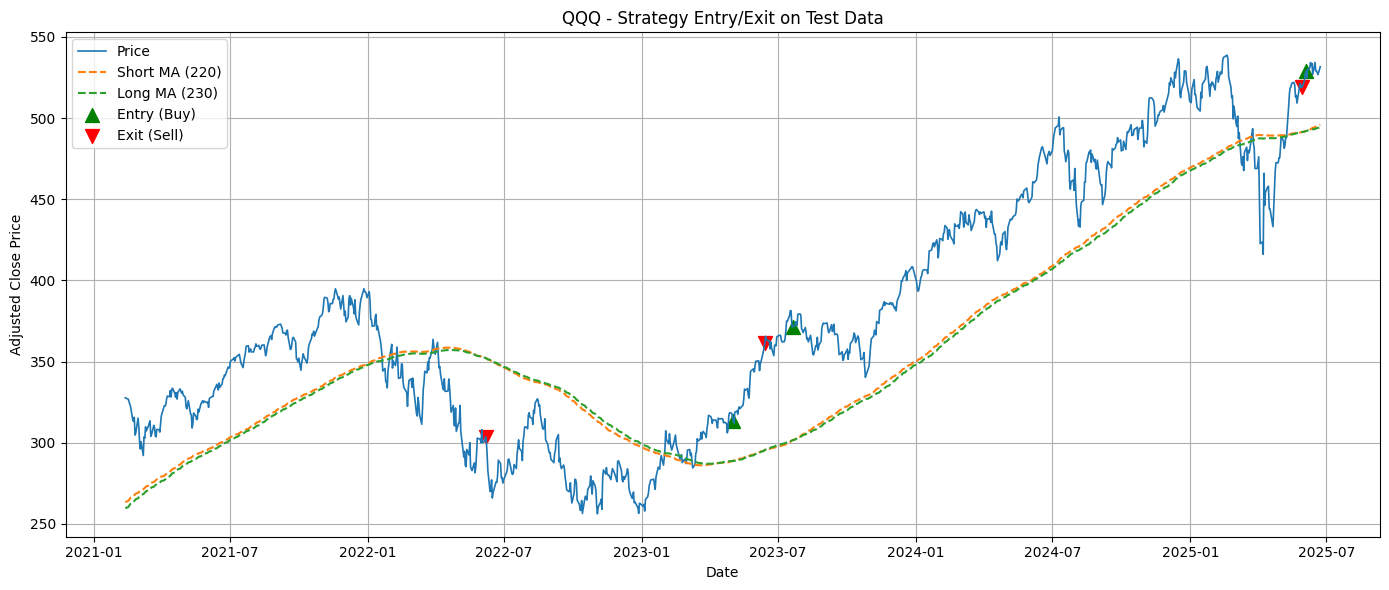

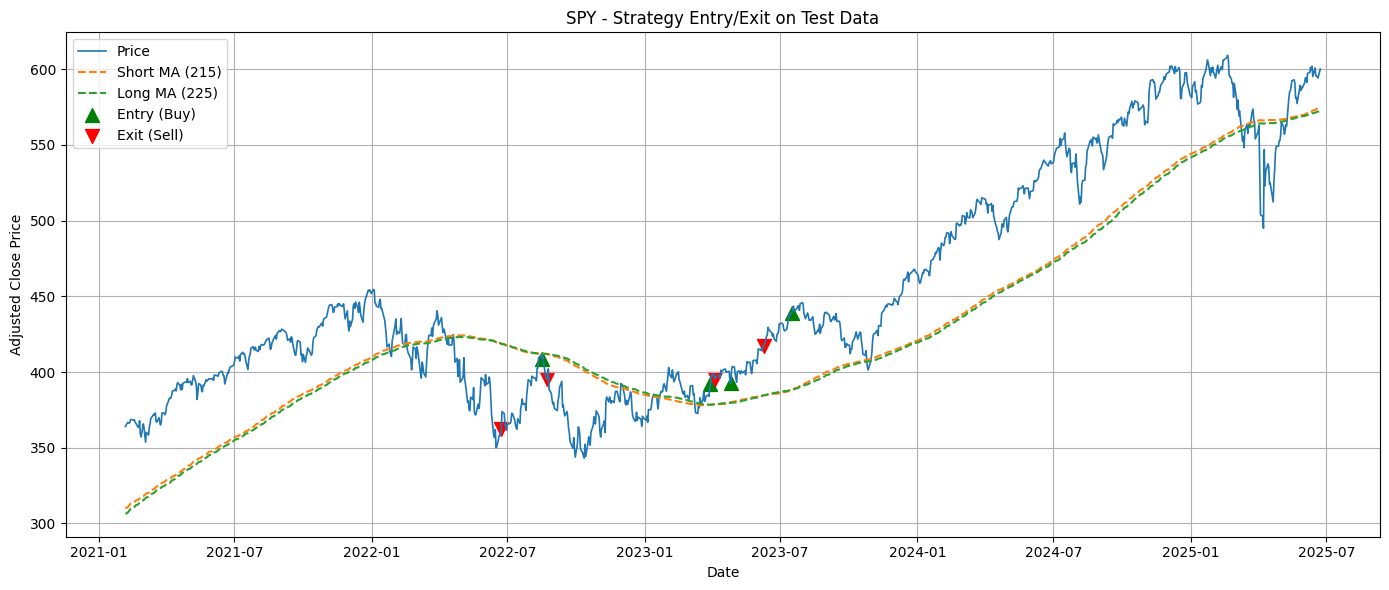

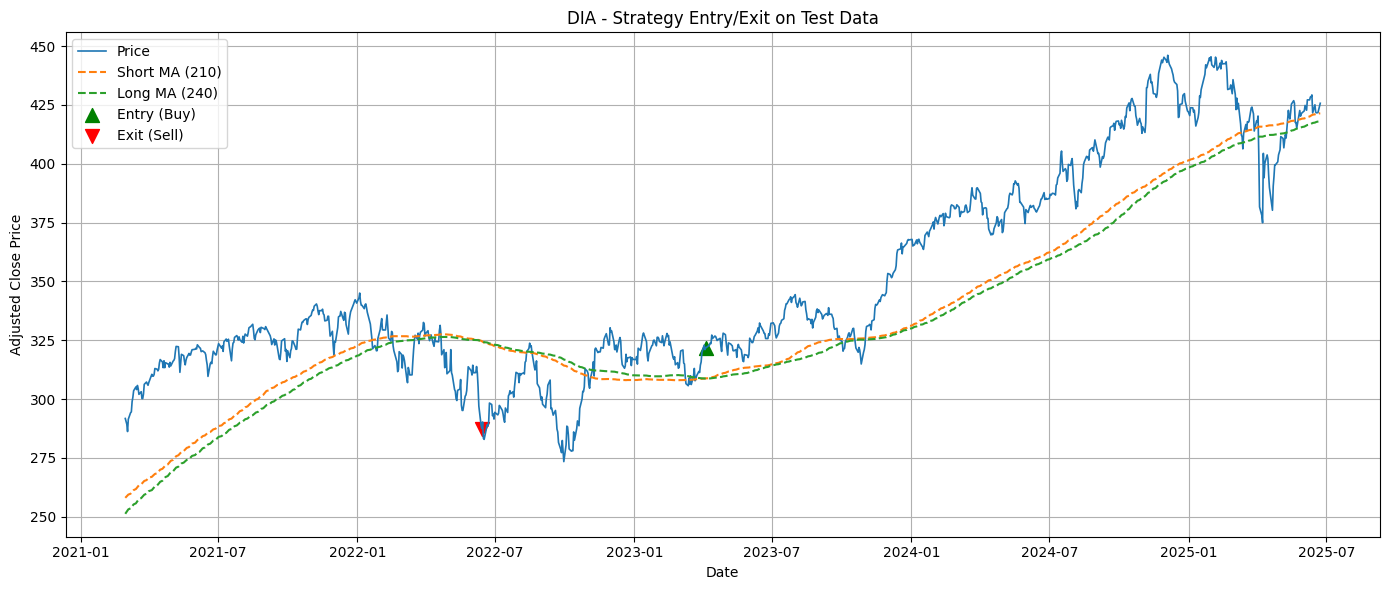

In [33]:
def plot_strategy_signals(etf, short, long, adj_test, log_test): #creating a new function for plotting 
    # Calculate short and long moving averages
    short_ma = adj_test[etf].rolling(short).mean()
    long_ma = adj_test[etf].rolling(long).mean()

    # Build strategy DataFrame
    df = pd.DataFrame({
        'price': adj_test[etf],
        'log_return': log_test[etf],
        'short_ma': short_ma,
        'long_ma': long_ma
    }).dropna()

    # Define strategy entry/exit points same as before 
    df['entry'] = (df['short_ma'] > df['long_ma']) & (df['short_ma'].shift(1) <= df['long_ma'].shift(1))
    df['exit'] = (df['short_ma'] < df['long_ma']) & (df['short_ma'].shift(1) >= df['long_ma'].shift(1))

    # Plotting
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['price'], label='Price', linewidth=1.2)
    plt.plot(df.index, df['short_ma'], label=f'Short MA ({short})', linestyle='--')
    plt.plot(df.index, df['long_ma'], label=f'Long MA ({long})', linestyle='--')

    # Green arrows for buy, red for sell
    plt.scatter(df.index[df['entry']], df['price'][df['entry']], 
                marker='^', color='green', label='Entry (Buy)', s=100)
    plt.scatter(df.index[df['exit']], df['price'][df['exit']], 
                marker='v', color='red', label='Exit (Sell)', s=100)

    plt.title(f'{etf} - Strategy Entry/Exit on Test Data')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Run this after loading adj_test and log_test
for etf, (short, long) in best_params.items():
    plot_strategy_signals(etf, short, long, adj_test, log_test)


In [34]:
thresholds = np.round(np.arange(0.0, 0.005, 0.0005), 5).tolist() #creating a list(vector) of thresholds
threshold_results = [] #empty list for results

# creating dictionary
# best_params = {
#     'QQQ': (qqq_short, qqq_long),
#     'SPY': (spy_short, spy_long),
#     'DIA': (dia_short, dia_long)
# }

for etf, (short, long) in best_params.items(): #creating a loop for etf using optimal short and long_mas' found
    # Compute MAs on test data
    short_ma = adj_test[etf].rolling(short).mean()
    long_ma = adj_test[etf].rolling(long).mean()
    #ensuring proper df 
    short_ma_df = pd.DataFrame(short_ma, index=adj_test.index, columns=[etf])
    long_ma_df = pd.DataFrame(long_ma, index=adj_test.index, columns=[etf])

    for threshold in thresholds: #inside the loop making another loop for each threshold and runing it through the function which will give returns by treshold 
        summary = ma_crossover_strategy(
            [etf],
            adj_close_price=adj_test,
            log_returns=log_test,
            short_ma=short_ma_df,
            long_ma=long_ma_df,
            threshold=threshold
        )
        #re-creating the df for aligning purposes 
        df = pd.DataFrame({
            'log_return': log_test[etf],
            'short_ma': short_ma,
            'long_ma': long_ma
        }).dropna().iloc[1:]  # shift(1) behavior
        
        #calculating buy and hold returns with aligned dates to the strategy 
        aligned_log_return = log_test[etf].loc[df.index]
        buy_hold_return = np.exp(aligned_log_return.sum()) - 1

        threshold_results.append({
            'ETF': etf,
            'Short_MA': short,
            'Long_MA': long,
            'Threshold': threshold,
            'Strategy Return': round(summary.loc[etf, 'Total Strategy Return'], 4),
            'Buy & Hold Return': round(buy_hold_return, 4),
            'Trade Count': int(summary.loc[etf, 'Trade Count'])
        })


In [35]:
#creating df
threshold_df = pd.DataFrame(threshold_results)

In [36]:
#finding top results
top_by_etf = threshold_df.sort_values(by='Strategy Return', ascending=False).groupby('ETF').head()
top_by_etf

,ETF,Short_MA,Long_MA,Threshold,Strategy Return,Buy & Hold Return,Trade Count
0,QQQ,220,230,0.0000,0.6207,0.6225,3
11,SPY,215,225,0.0005,0.5294,0.6488,1
10,SPY,215,225,0.0000,0.4178,0.6488,4
20,DIA,210,240,0.0000,0.3226,0.4591,1
16,SPY,215,225,0.0030,0.0000,0.6488,0
28,DIA,210,240,0.0040,0.0000,0.4591,0
27,DIA,210,240,0.0035,0.0000,0.4591,0
26,DIA,210,240,0.0030,0.0000,0.4591,0
25,DIA,210,240,0.0025,0.0000,0.4591,0
19,SPY,215,225,0.0045,0.0000,0.6488,0


Above was 80/20 split on entirity of data for realistic testing and strategy we will now do Walk-Forward Optimization 

In [38]:
def ma_crossover_strategy( #creating the ma_crossover_strategy function to calculate returns based on paramaters and 
    etfs,
    log_returns,
    short_ma,
    long_ma,
    threshold=0.0,  #input paramaters
    initial_position=0  # NEW: carry over position from training
):
    log_return_summary = {}  # empty dictionary to store returns

    for etf in etfs: #run the following for each etf: 
        # Build the DataFrame for this ETF with necessary columns
        df = pd.DataFrame({ #make a dataframe of the following dictionary key-value pairs
            'log_return': log_returns[etf],
            'short_ma': short_ma[etf],
            'long_ma': long_ma[etf]
        }).dropna()  # Drop rows with any missing data

        # ENTRY signal: short MA crosses above long MA + threshold
        df['entry_signal'] = (
            (df['short_ma'] > df['long_ma'] * (1 + threshold)) &
            (df['short_ma'].shift(1) <= df['long_ma'].shift(1))
        )

        # EXIT signal: short MA crosses below long MA - threshold
        df['exit_signal'] = (
            (df['short_ma'] < df['long_ma'] * (1 - threshold)) &
            (df['short_ma'].shift(1) >= df['long_ma'].shift(1))
        )

        # Initialize position tracking column
        df['position'] = np.nan

        # Apply entry/exit rules
        df.loc[df['entry_signal'], 'position'] = 1
        df.loc[df['exit_signal'], 'position'] = 0

        # Forward-fill position column, starting with initial_position
        df['position'] = df['position'].ffill()
        df.loc[df.index[0], 'position'] = initial_position  # Set first value manually 
        df['position'] = df['position'].ffill().fillna(0)

        # Shift position to avoid lookahead bias
        df['shifted_position'] = df['position'].shift(1)
        
        # Drop rows with NA from shift
        df.dropna(inplace=True)

        # Compute strategy returns
        df['strategy_log_return'] = df['shifted_position'] * df['log_return']

        # Count trades
        trade_count = df['entry_signal'].sum()

        # Store strategy return (Buy & Hold done outside now)
        log_return_summary[etf] = {
            'Total Strategy Return': np.exp(df['strategy_log_return'].sum()) - 1,
            'Trade Count': int(trade_count)
        }

    return pd.DataFrame(log_return_summary).T


Looping thorught the training and testing sets to find optimal paramaters and thresholds

In [39]:
def corrected_loop_with_buffer(adj_close_price, log_returns, etfs, train_years=2, test_years=1):
    #creating a function that will loop long and short_ma combinations on various thresholds to find optimal returns on training years 
    #and then compare performance on testing years. Walk forward split 2yrs-training and then 1yr-testing for entireity of the dataset
    walk_results = []
    #creating an empty list to store results

    # Threshold search space
    #creating a vector list of thresholds. from 0 to .005 jumping by .00025 and rounding to 5 decimal points
    thresholds = np.round(np.arange(0.0, 0.005, 0.00025), 5)

    # Get full date range
    #finding the entirity date length of the dataset using index of adjusted closing prices(row labels - dates0
    full_dates = adj_close_price.index #will give all the dates
    start_year = full_dates.min().year #will find the minimum date - the earliest date - furthest back
    end_year = full_dates.max().year #will find the latest date in the dataset

    for start in range(start_year, end_year - train_years - test_years + 1): #creating a range  (x-y) for each starting year 
        #meaning a range for 1999-2022 and then for 2000 - 2022 and so on... end year is subtracted by training years and test years but we 
        #add one because range(a,b) the a is inclusive and b is exclusive meaning not included in the calculation meaning the last year is cutoff
        #basically saying that for every number in this range do the following(exclusive of end value)
        
        # 1. Define calendar-aware train/test windows
        train_start = pd.Timestamp(f"{start}-01-01") #use timestamp from pandas library storing the starting date for each range loop
        #turns the string into a datetime object for arithmetic calculations
        train_end   = train_start + pd.DateOffset(years=train_years) - pd.Timedelta(days=1)
        # the dateoffset is adding exactly training years to the timestamp =2yrs and the timedelta is subtracting 1 day so we land on 12-31
        test_start  = train_end + pd.Timedelta(days=1)
        #the test start adds a day so we land on the 1st of the year again
        test_end    = test_start + pd.DateOffset(years=test_years) - pd.Timedelta(days=1)
        #the test end is getting the test years added which is 1yr and subtracting 1 day again so we land on 12-31
#Use Case	Recommended Function	Why?
# Add/subtract days	pd.Timedelta(days=...)	Exact time math
# Add/subtract weeks	pd.Timedelta(weeks=...)	Exact, consistent
# Add/subtract months	pd.DateOffset(months=...)	Handles month length variation
# Add/subtract years	pd.DateOffset(years=...)	Handles leap years, calendar logic
# logic here is that dateoffset can also subtract but would have to use negative value so visually better to use Timedelta also when subtracting

        # 2. Slice training data
        adj_train = adj_close_price.loc[train_start:train_end]
#slicing data so that we have the adj_train assigned to the rows from training start to training end. both inclusive 
        log_train = log_returns.loc[train_start:train_end]
        #getting log_test
        log_test = log_returns.loc[test_start:test_end]
        #getting adj_test
        adj_test = adj_close_price.loc[test_start:test_end]


        # 3. Grid search for best strategy parameters
        results = [] #creating an empty list for results for the best short and long_ma combination
        for short in range(5, 50): # Loop through all short moving average windows from 5 to 49 (inclusive)
            for long in range(short + 1, 51):# For each short MA do a loop through x+1 to 50 and do the following for each
 
                short_ma = adj_train.rolling(short).mean() #create a rolling average
                long_ma = adj_train.rolling(long).mean()
                short_df = pd.DataFrame(short_ma, index=adj_train.index, columns=adj_train.columns) #create a dataframe (ensure consinstency)
                long_df = pd.DataFrame(long_ma, index=adj_train.index, columns=adj_train.columns)

                for threshold in thresholds: 
# For every short_ma value from 5 to 49,
# try every possible long_ma value that is larger than short_ma (from short_ma+1 to 50).
# For each (short_ma, long_ma) pair, loop through all threshold values from 0.0 to 0.005, stepping by 0.00025.
# This way, we try every combination of short MA, long MA, and threshold to find the best-performing set.

                    print(f"Training Year: {start}, Short: {short}, Long: {long}, Threshold: {threshold}", end="\r")
                    sys.stdout.flush() #end="\r"tells Python not to move to a new line after printing.next print() to overwrite the same line
                    #the sys.stdout.flush() basically forces out output meaning it gets rid of any buffer or anything that python might have to print output

                    summary = ma_crossover_strategy(
                        etfs, log_train, short_df, long_df, threshold
                    ) #run this combination through our strategy function define above 

                    for etf in etfs: #and for every etf defined earlier as ['DIA,'SPY','QQQ'] append adding an element to the end of a list and add the following 
                        results.append({ #{ = dict.
                            'ETF': etf,  #defining dictionary terms meaning we are adding a dictionary into a list with key 'ETF' (STRING) and value of the ETF = 'QQQ'
                            'Short_MA': short,
                            'Long_MA': long,
                            'Threshold': threshold,
                            'Return': summary.loc[etf, 'Total Strategy Return'],
                            'Trade Count': summary.loc[etf, 'Trade Count']
                        })

        # 4. Select best config per ETF
        results_df = pd.DataFrame(results) #turning  the giant dictionary into a dataframe. keys become columns and values become rows
        best_ma = results_df.sort_values('Return', ascending=False).groupby('ETF').first() 
        #now we sort by return and then group by ETF and then take the first row for eahc which is the highest return 
        #this is inside the training year loop so it is doing this for every individual training period 

        # 5. Apply best strategy on the test set and apply a buffer
        buffer_days = 100 #assigning buffer to 100 days 
        test_start_buffered = test_start - pd.Timedelta(days=buffer_days) #subtracting buffer days from test set to go back 100 days 
        adj_test_buffered = adj_close_price.loc[test_start_buffered:test_end] #snip the following rows from adjusted close from 100 back from test period to end of test period

        for etf in etfs: #now for the best paramaters for that testing period for each etf do the following 
            short = int(best_ma.loc[etf, 'Short_MA']) #assign short_ma value to short variable
            long = int(best_ma.loc[etf, 'Long_MA'])
            threshold = best_ma.loc[etf, 'Threshold']

            # Rolling averages on buffered data
            short_ma = adj_test_buffered[etf].rolling(short).mean() #calculate the rolling average using paramaters from testing period but applying 
            #to the buffered testing period (includes 100 days back)
            long_ma = adj_test_buffered[etf].rolling(long).mean() #same for long. this buffer ensures that our logn and short are calcualted before testing period so we dont have x empty data
            #rows and going in blind(unrealistic when historical data is available) 

            short_df = pd.DataFrame(short_ma, index=adj_test_buffered.index, columns=[etf]) #wrap those into a df again ensuring consistent columns and index
            long_df  = pd.DataFrame(long_ma, index=adj_test_buffered.index, columns=[etf])

            # Determine last signal from training set
            last_train_short = adj_train[etf].rolling(short).mean().iloc[-1]  #finding the last value of short in training period
            last_train_long = adj_train[etf].rolling(long).mean().iloc[-1]    #finding the last value of long in training period 
            initial_position = int(last_train_short > last_train_long * (1 + threshold)) #calculating the boolean (TRUE or FALSE) but the 
            #int() is turning the TRUE=1 and FALSE=0. so if the last short was greater than the last long multiplied by optimal threshold then 
            #we are ina  position

            # Run strategy on the TESTING SET now with previous position signal 
            summary = ma_crossover_strategy(
                etfs=[etf],
                log_returns=log_test,
                short_ma=short_df,
                long_ma=long_df,
                threshold=threshold,
                initial_position=initial_position  # Must be supported in your function
            )

            # Store results (test_start buffer already handled inside strategy)
            walk_results.append({ #adding new element to list, specifically adding dictionaries(key-value pair)
                'Train Start': train_start,
                'Train End': train_end,
                'Test Start': test_start,
                'Test End': test_end,
                'ETF': etf,
                'Short_MA': short,
                'Long_MA': long,
                'Threshold': threshold,
                'Strategy Return': round(summary.loc[etf, 'Total Strategy Return'], 4),
                'Trade Count': int(summary.loc[etf, 'Trade Count'])
            })

    return pd.DataFrame(walk_results) #returning the results as a dataframe 


In [48]:
 # Example call
results_df = corrected_loop_with_buffer(
     adj_close_price=adj_close_price,      # your full adjusted close price DataFrame
     log_returns=log_returns,              # your full log return DataFrame
     etfs=['DIA', 'SPY', 'QQQ'],           # list of ETFs you want to backtest
     train_years=2,                        # training window length
     test_years=1                          # testing window length
)

Training Year: 2022, Short: 49, Long: 50, Threshold: 0.00475

In [40]:
results_df.to_csv("DATA/position_buffer_results.csv", index=False)
print("Saved to walk_forward_results.csv ✅ HURRAY")

# # To get average strategy return per ETF:
# walk_df.groupby('ETF')[['Strategy Return', 'Buy & Hold Return', 'Trade Count']].mean().round(4)



Saved to walk_forward_results.csv ✅ HURRAY


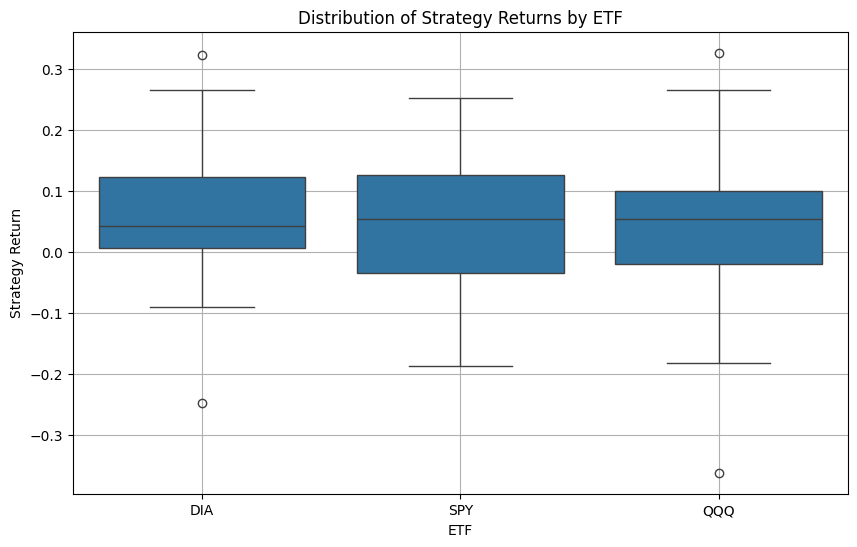

In [44]:
results_df

#boxplot of strategy returns thorughout time by ETF

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='ETF', y='Strategy Return')
plt.title("Distribution of Strategy Returns by ETF")
plt.grid(True)
plt.show()


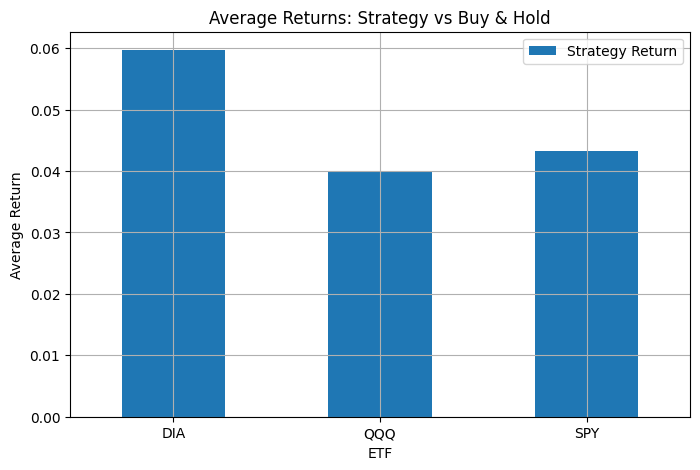

In [45]:
 # Bar Plot of Average Strategy Return vs Buy & Hold (per ETF)
avg_returns = results_df.groupby('ETF')['Strategy Return'].mean().reset_index()

avg_returns.plot(
    x='ETF',
    kind='bar',
    figsize=(8, 5),
    title='Average Returns: Strategy vs Buy & Hold',
    rot=0
)
plt.ylabel("Average Return")
plt.grid(True)
plt.show()


Introducing Sharpe Ratio: Sharpe Ratio= (μ−rf)/σ  where u is the return, rf is the risk free rate and Sigma is the standard deviation

In [34]:
def ma_crossover(
    etfs,
    log_returns,
    short_ma,
    long_ma,
    threshold=0.0,
    initial_position=0
):
    log_return_summary = {}  # Dictionary to store results

    for etf in etfs:
        # Build DataFrame
        df = pd.DataFrame({
            'log_return': log_returns[etf],
            'short_ma': short_ma[etf],
            'long_ma': long_ma[etf]
        }).dropna()

        # Raw signals (before filtering)
        df['entry_signal'] = (
            (df['short_ma'] > df['long_ma'] * (1 + threshold)) &
            (df['short_ma'].shift(1) <= df['long_ma'].shift(1))
        )

        df['exit_signal'] = (
            (df['short_ma'] < df['long_ma'] * (1 - threshold)) &
            (df['short_ma'].shift(1) >= df['long_ma'].shift(1))
        )

        # Filter signals based on position
        position = initial_position  # <-- FIXED: use initial position
        entry_mask = []
        exit_mask = []

        for i in range(len(df)):
            if df['entry_signal'].iloc[i] and position == 0:
                entry_mask.append(True)
                exit_mask.append(False)
                position = 1
            elif df['exit_signal'].iloc[i] and position == 1:
                entry_mask.append(False)
                exit_mask.append(True)
                position = 0
            else:
                entry_mask.append(False)
                exit_mask.append(False)

        df['entry_signal'] = entry_mask
        df['exit_signal'] = exit_mask

        # Explicit position tracking using updated signals
        position_list = []
        current_position = initial_position

        for i in range(len(df)):
            if df['entry_signal'].iloc[i] and current_position == 0:
                current_position = 1
            elif df['exit_signal'].iloc[i] and current_position == 1:
                current_position = 0
            position_list.append(current_position)

        df['position'] = position_list

        # Shift position to avoid lookahead bias
        df['shifted_position'] = df['position'].shift(1)
        df.dropna(inplace=True)

        # Strategy returns
        df['strategy_log_return'] = df['shifted_position'] * df['log_return']

        # Metrics
        trade_count = df['entry_signal'].sum() + df['exit_signal'].sum()
        mean_return = df['strategy_log_return'].mean()
        std_return = df['strategy_log_return'].std()
        sharpe_ratio = mean_return / std_return if std_return > 0 else 0

        log_return_summary[etf] = {
            'Total Strategy Return': np.exp(df['strategy_log_return'].sum()) - 1,
            'Trade Count': int(trade_count),
            'Sharpe': sharpe_ratio
        }

    return pd.DataFrame(log_return_summary).T


In [38]:
def loop_sharp(adj_close_price, log_returns, etfs, train_years=3, test_years=2):
    #creating a function that will loop long and short_ma combinations on various thresholds to find optimal returns on training years 
    #and then compare performance on testing years. Walk forward split 2yrs-training and then 1yr-testing for entireity of the dataset
    walk_results = []
    #creating an empty list to store results

    # Threshold search space
    #creating a vector list of thresholds. from 0 to .005 jumping by .00025 and rounding to 5 decimal points
    thresholds = np.round(np.arange(0.0, 0.005, 0.00025), 5)

    # Get full date range
    #finding the entirity date length of the dataset using index of adjusted closing prices(row labels - dates0
    full_dates = adj_close_price.index #will give all the dates
    start_year = full_dates.min().year #will find the minimum date - the earliest date - furthest back
    end_year = full_dates.max().year #will find the latest date in the dataset

    for start in range(start_year, end_year - train_years - test_years + 1): #creating a range  (x-y) for each starting year 
        #meaning a range for 1999-2022 and then for 2000 - 2022 and so on... end year is subtracted by training years and test years but we 
        #add one because range(a,b) the a is inclusive and b is exclusive meaning not included in the calculation meaning the last year is cutoff
        #basically saying that for every number in this range do the following(exclusive of end value)
        
        # 1. Define calendar-aware train/test windows
        train_start = pd.Timestamp(f"{start}-01-01") #use timestamp from pandas library storing the starting date for each range loop
        #turns the string into a datetime object for arithmetic calculations
        train_end   = train_start + pd.DateOffset(years=train_years) - pd.Timedelta(days=1)
        # the dateoffset is adding exactly training years to the timestamp =2yrs and the timedelta is subtracting 1 day so we land on 12-31
        test_start  = train_end + pd.Timedelta(days=1)
        #the test start adds a day so we land on the 1st of the year again
        test_end    = test_start + pd.DateOffset(years=test_years) - pd.Timedelta(days=1)
        #the test end is getting the test years added which is 1yr and subtracting 1 day again so we land on 12-31
#Use Case	Recommended Function	Why?
# Add/subtract days	pd.Timedelta(days=...)	Exact time math
# Add/subtract weeks	pd.Timedelta(weeks=...)	Exact, consistent
# Add/subtract months	pd.DateOffset(months=...)	Handles month length variation
# Add/subtract years	pd.DateOffset(years=...)	Handles leap years, calendar logic
# logic here is that dateoffset can also subtract but would have to use negative value so visually better to use Timedelta also when subtracting

        # 2. Slice training data
        adj_train = adj_close_price.loc[train_start:train_end]
#slicing data so that we have the adj_train assigned to the rows from training start to training end. both inclusive 
        log_train = log_returns.loc[train_start:train_end]
        #getting log_test
        log_test = log_returns.loc[test_start:test_end]
        #getting adj_test
        adj_test = adj_close_price.loc[test_start:test_end]


        # 3. Grid search for best strategy parameters
        results = [] #creating an empty list for results for the best short and long_ma combination
        for short in range(10, 100, 5): # Loop through all short moving average windows from 5 to 49 (inclusive)
            for long in range(short + 10, 255, 5):# For each short MA do a loop through x+1 to 50 and do the following for each
 
                short_ma = adj_train.rolling(short).mean() #create a rolling average
                long_ma = adj_train.rolling(long).mean()
                short_df = pd.DataFrame(short_ma, index=adj_train.index, columns=adj_train.columns) #create a dataframe (ensure consinstency)
                long_df = pd.DataFrame(long_ma, index=adj_train.index, columns=adj_train.columns)

                for threshold in thresholds: 
# For every short_ma value from 5 to 49,
# try every possible long_ma value that is larger than short_ma (from short_ma+1 to 50).
# For each (short_ma, long_ma) pair, loop through all threshold values from 0.0 to 0.005, stepping by 0.00025.
# This way, we try every combination of short MA, long MA, and threshold to find the best-performing set.

                    print(f"Training Year: {start}, Short: {short}, Long: {long}, Threshold: {threshold}", end="\r")
                    sys.stdout.flush() #end="\r"tells Python not to move to a new line after printing.next print() to overwrite the same line
                    #the sys.stdout.flush() basically forces out output meaning it gets rid of any buffer or anything that python might have to print output

                    summary = ma_crossover(
                        etfs, log_train, short_df, long_df, threshold
                    ) #run this combination through our strategy function define above 

                    MIN_TRADES = 4

                    for etf in etfs: 
                        trade_count = summary.loc[etf, 'Trade Count']

                        if trade_count >= MIN_TRADES:
                        #and for every etf defined earlier as ['DIA,'SPY','QQQ'] append adding an element to the end of a list and add the following 
                            results.append({ #{ = dict.
                                'ETF': etf,  #defining dictionary terms meaning we are adding a dictionary into a list with key 'ETF' (STRING) and value of the ETF = 'QQQ'
                                'Short_MA': short,
                                'Long_MA': long,
                                'Threshold': threshold,
                                'Return': summary.loc[etf, 'Total Strategy Return'],
                                'Trade Count': summary.loc[etf, 'Trade Count'],
                                'Sharpe': summary.loc[etf, 'Sharpe']  # NEW: Store Sharpe
                            })

        # 4. Select best config per ETF
        results_df = pd.DataFrame(results) #turning  the giant dictionary into a dataframe. keys become columns and values become rows
        best_ma = results_df.sort_values('Sharpe', ascending=False).groupby('ETF').first()  # NEW: Sort by Sharpe
        #now we sort by return and then group by ETF and then take the first row for eahc which is the highest return 
        #this is inside the training year loop so it is doing this for every individual training period 

        # 5. Apply best strategy on the test set and apply a buffer
        buffer_days = 400 
        #assigning buffer to 400 days 
        test_start_buffered = test_start - pd.Timedelta(days=buffer_days) #subtracting buffer days from test set to go back 400 days 
        adj_test_buffered = adj_close_price.loc[test_start_buffered:test_end] #snip the following rows from adjusted close from 400 back from test period to end of test period

        for etf in etfs: #now for the best paramaters for that testing period for each etf do the following 
            short = int(best_ma.loc[etf, 'Short_MA']) #assign short_ma value to short variable
            long = int(best_ma.loc[etf, 'Long_MA'])
            threshold = best_ma.loc[etf, 'Threshold']

            # Rolling averages on buffered data
            short_ma = adj_test_buffered[etf].rolling(short).mean() #calculate the rolling average using paramaters from testing period but applying 
            #to the buffered testing period (includes 400 days back)
            long_ma = adj_test_buffered[etf].rolling(long).mean() #same for long. this buffer ensures that our logn and short are calcualted before testing period so we dont have x empty data
            #rows and going in blind(unrealistic when historical data is available) 

            short_df = pd.DataFrame(short_ma, index=adj_test_buffered.index, columns=[etf]) #wrap those into a df again ensuring consistent columns and index
            long_df  = pd.DataFrame(long_ma, index=adj_test_buffered.index, columns=[etf])

            # Determine last signal from training set
            last_train_short = adj_train[etf].rolling(short).mean().iloc[-1]  #finding the last value of short in training period
            last_train_long = adj_train[etf].rolling(long).mean().iloc[-1]    #finding the last value of long in training period 
            initial_position = int(last_train_short > last_train_long * (1 + threshold)) #calculating the boolean (TRUE or FALSE) but the 
            #int() is turning the TRUE=1 and FALSE=0. so if the last short was greater than the last long multiplied by optimal threshold then 
            #we are ina  position

            # Run strategy on the TESTING SET now with previous position signal 
            summary = ma_crossover(
                etfs=[etf],
                log_returns=log_test,
                short_ma=short_df,
                long_ma=long_df,
                threshold=threshold,
                initial_position=initial_position  # Must be supported in your function
            )

            # Store results (test_start buffer already handled inside strategy)
            walk_results.append({ #adding new element to list, specifically adding dictionaries(key-value pair)
                'Train Start': train_start,
                'Train End': train_end,
                'Test Start': test_start,
                'Test End': test_end,
                'ETF': etf,
                'Short_MA': short,
                'Long_MA': long,
                'Threshold': threshold,
                'Strategy Return': round(summary.loc[etf, 'Total Strategy Return'], 4),
                'Trade Count': int(summary.loc[etf, 'Trade Count']),
                'Sharpe': round(summary.loc[etf, 'Sharpe'], 4)
            })

    return pd.DataFrame(walk_results) #returning the results as a dataframe 


In [39]:
results_df = loop_sharp(
    adj_close_price=adj_close_price,
    log_returns=log_returns,
    etfs=['DIA', 'SPY', 'QQQ'],  # or whichever ETFs you're testing
    train_years=3,
    test_years=2
)

results_df.to_csv("strategy_results_sharpe_based_final.csv", index=False)


Training Year: 2020, Short: 95, Long: 250, Threshold: 0.00475

In [42]:
# Load your previously saved walk-forward strategy results
results_df = pd.read_csv("strategy_results_sharpe_based_final.csv", parse_dates=['Train Start', 'Train End', 'Test Start', 'Test End'])

# Confirm structure
print(results_df.head())
print(results_df.columns)


  Train Start  Train End Test Start   Test End  ETF  Short_MA  Long_MA  \
0  1999-01-01 2001-12-31 2002-01-01 2003-12-31  DIA        10       20   
1  1999-01-01 2001-12-31 2002-01-01 2003-12-31  SPY        85       95   
2  1999-01-01 2001-12-31 2002-01-01 2003-12-31  QQQ        15       35   
3  2000-01-01 2002-12-31 2003-01-01 2004-12-31  DIA        10       20   
4  2000-01-01 2002-12-31 2003-01-01 2004-12-31  SPY        65       80   

   Threshold  Strategy Return  Trade Count  Sharpe  
0    0.00100           0.2445            6  0.0461  
1    0.00025           0.0411            3  0.0059  
2    0.00150          -0.1209            6 -0.0132  
3    0.00050           0.1676           11  0.0423  
4    0.00025           0.2796            3  0.0598  
Index(['Train Start', 'Train End', 'Test Start', 'Test End', 'ETF', 'Short_MA',
       'Long_MA', 'Threshold', 'Strategy Return', 'Trade Count', 'Sharpe'],
      dtype='object')
